#### Author : SINU S MARIAM
#### Designation : Data Science Intern  
#### Organization : Bharat Intern
#### Task 1 - STOCK PREDICTION
#### Problem Statement:
*  Perform Stock Price Analysis & Forecasting of stock prices of a company using LSTM.



In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#importing tensorflow
import tensorflow as tf

In [2]:
tf.__version__

'2.13.0'

In [3]:
from google.colab import files
uploaded = files.upload()

Saving yahoo_stock.csv to yahoo_stock.csv


In [4]:
import io
data_frame = pd.read_csv(io.BytesIO(uploaded['yahoo_stock.csv']))

####  Performing descriptive analysis. Understand the variables and their corresponding values.

In [5]:
# Understanding the dimensions of data
data_frame.shape

(1825, 7)

In [7]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [8]:
data_frame.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

* Columns are Open , High, Low, Last , Close, Volume ,Adj Close and the corresponding Dates.

In [9]:
# Show the top 5 Rows of data
data_frame.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [10]:
data_frame.tail(5)

,Date,High,Low,Open,Close,Volume,Adj Close
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


In [11]:
#Finding the period of time of stock data available
print('Stock data starting date: ', data_frame["Date"].min())
print('Stock data ending date: ', data_frame["Date"].max())

Stock data starting date:  2015-11-23
Stock data ending date:  2020-11-20


* Time frame of Stock market data is from 23rd November 2015 to 20th November 2020

In [12]:
# Arrange in terms of date
data_frame.set_index("Date",inplace=True)
data_frame.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [13]:
# Performing Descriptive Analysis
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
High,1825.0,2.660719e+03,4.096809e+02,1.847000e+03,2.348350e+03,2.696250e+03,2.930790e+03,3.645990e+03
Low,1825.0,2.632818e+03,4.043101e+02,1.810100e+03,2.322250e+03,2.667840e+03,2.900710e+03,3.600160e+03
Open,1825.0,2.647705e+03,4.071700e+02,1.833400e+03,2.341980e+03,2.685490e+03,2.913860e+03,3.612090e+03
Close,1825.0,2.647856e+03,4.073012e+02,1.829080e+03,2.328950e+03,2.683340e+03,2.917520e+03,3.626910e+03
Volume,1825.0,3.869627e+09,1.087593e+09,1.296540e+09,3.257950e+09,3.609740e+09,4.142850e+09,9.044690e+09
Adj Close,1825.0,2.647856e+03,4.073012e+02,1.829080e+03,2.328950e+03,2.683340e+03,2.917520e+03,3.626910e+03


* Most of the values in Open, close, high , low and last are similar

In [14]:
# Checking for null values
data_frame.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

DATA VISUALISATION

In [15]:
# find correlation between variables in data set for plotting heatmap
df_corr=data_frame.corr()
df_corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998154,0.999328,0.998958,0.084212,0.998958
Low,0.998154,1.000000,0.998794,0.999020,0.044557,0.999020
Open,0.999328,0.998794,1.000000,0.998344,0.069729,0.998344
Close,0.998958,0.999020,0.998344,1.000000,0.063401,1.000000
Volume,0.084212,0.044557,0.069729,0.063401,1.000000,0.063401
Adj Close,0.998958,0.999020,0.998344,1.000000,0.063401,1.000000


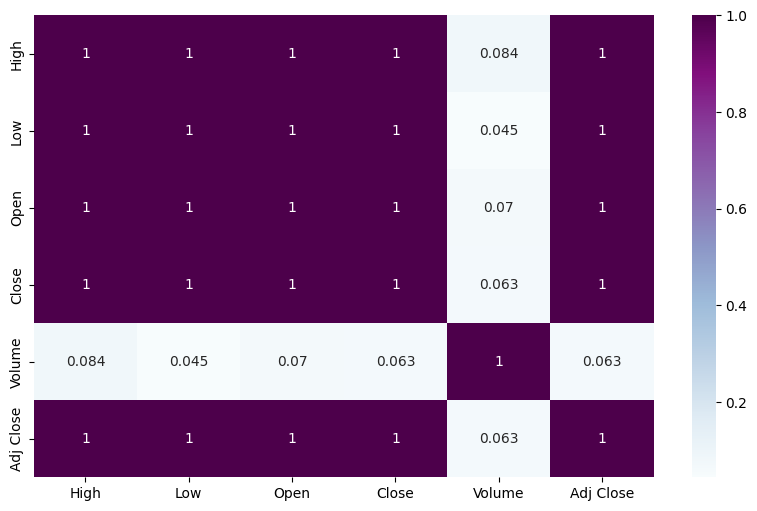

In [16]:
# Plotting Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,cmap="BuPu")
plt.show()

* Most of the values are highly correlated with each other

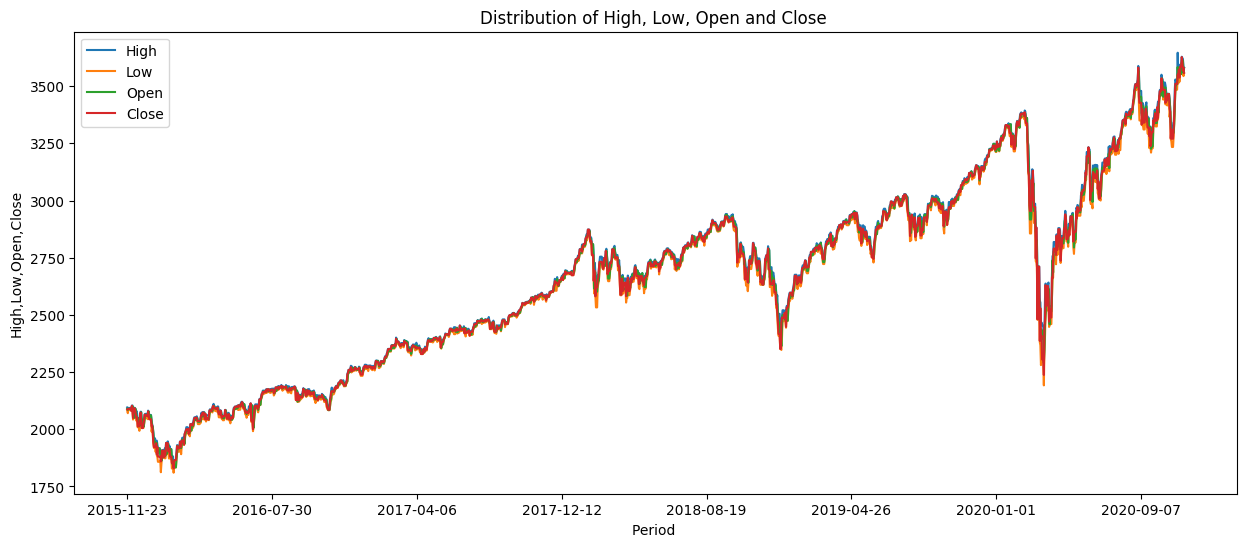

In [17]:
# Plotting the distribution of High, Low , Open and Close variables
data_frame[["High", "Low", "Open", "Close"]].plot(figsize=(15,6))
plt.xlabel("Period ")
plt.ylabel("High,Low,Open,Close")
plt.title("Distribution of High, Low, Open and Close ")
plt.legend(loc="best")

* Here values in Close, Open, High and Low follows similar pattern. So for furthur analysis, Values in 'Close' are only taken.

In [18]:
# Taking the Close variable for further analysis
data_frame_column_Close=data_frame.reset_index()['Close']
print(data_frame_column_Close)

0       2086.590088
1       2089.139893
2       2088.870117
3       2088.870117
4       2090.110107
           ...     
1820    3626.909912
1821    3609.530029
1822    3567.790039
1823    3581.870117
1824    3557.540039
Name: Close, Length: 1825, dtype: float64


#### Plotting distribution of Close variable

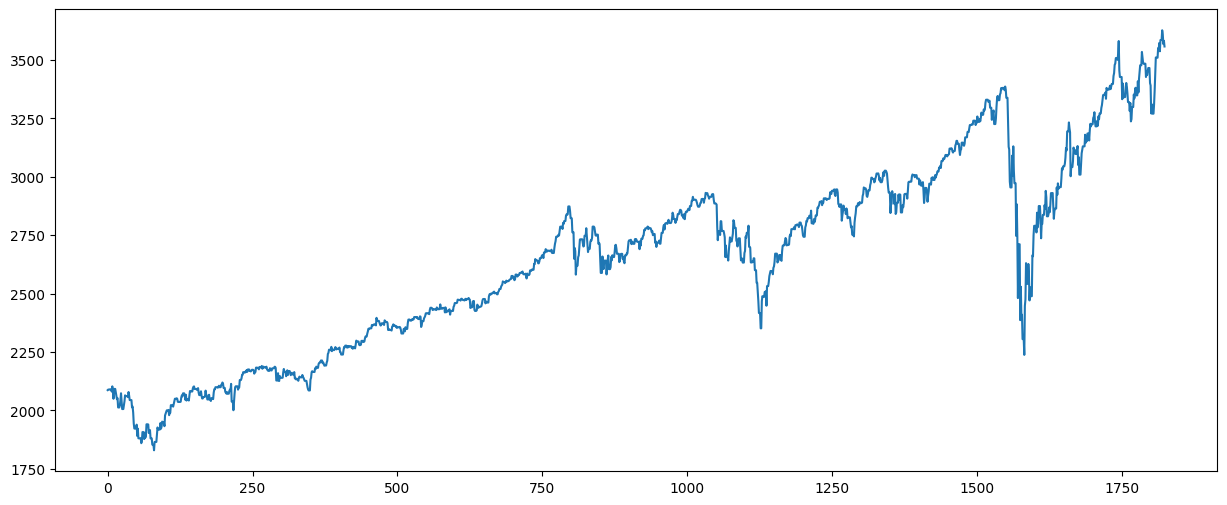

In [19]:
plt.figure(figsize=(15,6))
plt.plot(data_frame_column_Close)
plt.show()

In [20]:
# Min Max Scaling transforms data by scaling features to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_frame_column_Close=scaler.fit_transform(np.array(data_frame_column_Close).reshape(-1,1))
data_frame_column_Close

array([[0.14323386],
       [0.14465213],
       [0.14450208],
       ...,
       [0.96711598],
       [0.97494769],
       [0.96141466]])

In [21]:
# Print Length of train and test dataset
# Train size is taken as 0.75 of total dataset
train_size=int(len(data_frame_column_Close)*0.75)
test_size=len(data_frame_column_Close)-train_size
length=len(data_frame_column_Close)
print('Train size: ', train_size)
print('Test size: ', test_size)

Train size:  1368
Test size:  457


In [22]:
# Splitting into train and test data set
train_data,test_data=data_frame_column_Close[0:train_size,:],data_frame_column_Close[train_size:length,:1]
train_data

array([[0.14323386],
       [0.14465213],
       [0.14450208],
       ...,
       [0.60882841],
       [0.59595739],
       [0.60926228]])

In [23]:
# Defining the function stock_close for differentiating feature and target variable
def stock_close(x, step=1):
	feature,target = [], []

	for i in range(len(x)-step):
		tmp_x = x[i:i+step, 0]
		feature.append(tmp_x)
		target.append(x[i + step, 0])
	return np.array(feature), np.array(target)

In [24]:
# Defining train and test data
X_train, y_train = stock_close(train_data, 100)
X_test, ytest = stock_close(test_data, 100)


In [25]:
# Printing dimensions of train dataset
print(X_train.shape), print(y_train.shape)

(1268, 100)
(1268,)


(None, None)

In [26]:
# Printing dimensions of test dataset
print(X_test.shape), print(ytest.shape)

(357, 100)
(357,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#### Building the Neutral Network Model

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

#Layers are added to model
# Long short-term memory (LSTM) model is a variation of RNN ( Recurrent Neural Network)
# Stock Prices are highly dependent on time frame
# LSTM capable of processing  long-term dependencies in time-series data.
# Fully connected layer makes the final prediction.
my_model=Sequential()
my_model.add(LSTM(64,return_sequences=True,input_shape=(100,1)))
my_model.add(LSTM(32))
my_model.add(Dense(1))

In [29]:
# Model Compilation
my_model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
# Model Summary
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Fitting the model
# Epoch refers to one cycle through full training dataset. Here 30 Epochs are used
my_model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
20/20 [==============================] - 5s 102ms/step - loss: 0.0243 - val_loss: 0.0432
Epoch 2/30
20/20 [==============================] - 1s 71ms/step - loss: 0.0025 - val_loss: 0.0136
Epoch 3/30
20/20 [==============================] - 1s 71ms/step - loss: 9.2325e-04 - val_loss: 0.0065
Epoch 4/30
20/20 [==============================] - 1s 71ms/step - loss: 4.9597e-04 - val_loss: 0.0045
Epoch 5/30
20/20 [==============================] - 2s 91ms/step - loss: 4.5381e-04 - val_loss: 0.0040
Epoch 6/30
20/20 [==============================] - 2s 92ms/step - loss: 4.5282e-04 - val_loss: 0.0041
Epoch 7/30
20/20 [==============================] - 1s 69ms/step - loss: 4.7682e-04 - val_loss: 0.0043
Epoch 8/30
20/20 [==============================] - 1s 73ms/step - loss: 4.4176e-04 - val_loss: 0.0039
Epoch 9/30
20/20 [==============================] - 1s 75ms/step - loss: 4.3982e-04 - val_loss: 0.0040
Epoch 10/30
20/20 [==============================] - 1s 68ms/step - loss: 4.3888

#### Prediction

In [32]:
# Prediction of Close value Prices
X_predict = my_model.predict(X_train)
y_predict = my_model.predict(X_test)


12/12 [==============================] - 0s 15ms/step


In [33]:
# Inverse Transformation
X_predict = scaler.inverse_transform(X_predict)
y_predict = scaler.inverse_transform(y_predict)


In [34]:
# Reshaping train and test values
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1])
y_train =y_train.reshape(-1,1)
ytest = ytest.reshape(-1,1)
# Inverse Transformation
X_test=scaler.inverse_transform(X_test)
X_train=scaler.inverse_transform(X_train)
ytest=scaler.inverse_transform(ytest)
y_train=scaler.inverse_transform(y_train)

In [35]:
# Length of X_train and X_test
lentrain=len(X_train)
lentest=len(X_test)

Text(0.5, 1.0, 'Test Values & Predicted Values along with train values ')

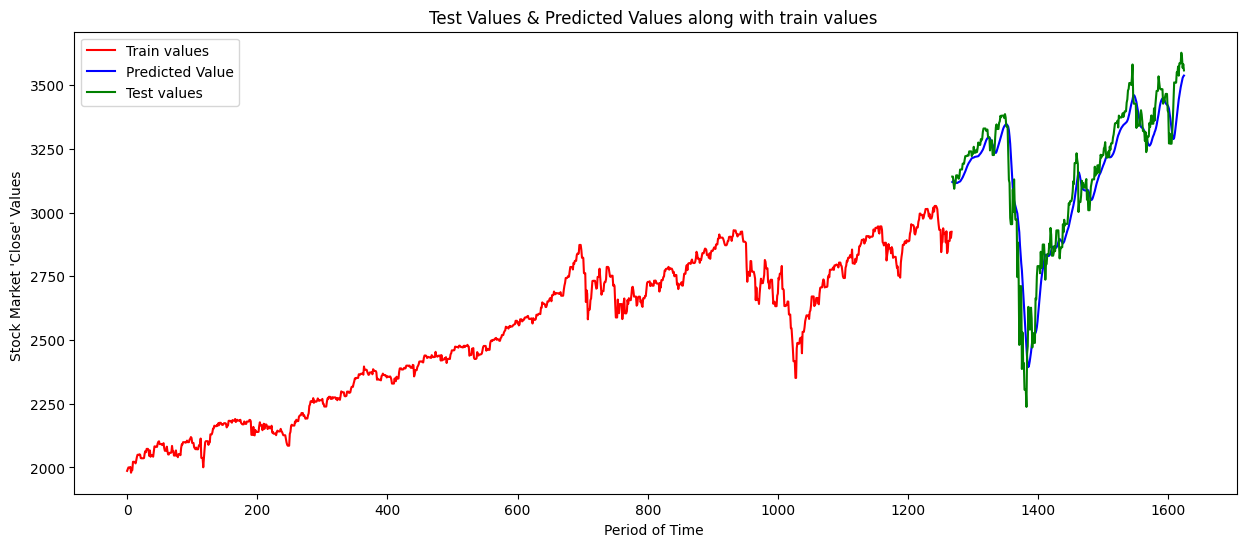

In [36]:
# Plotting Close value Price including the Predicted and Actual values
plt.figure(figsize=(15,6))
plt.plot(np.arange(0, lentrain), y_train, 'r', label="Train values")

plt.plot(np.arange(lentrain, lentrain + lentest), y_predict, 'b', label="Predicted Value")

plt.plot(np.arange(lentrain, lentrain + lentest), ytest, 'g', label="Test values")
plt.legend(loc="best")

plt.xlabel("Period of Time ")
plt.ylabel("Stock Market 'Close' Values ")
plt.title("Test Values & Predicted Values along with train values ")


#### Test the model

In [37]:
# Find Mean Sqaured Error
from sklearn.metrics import mean_squared_error , r2_score
mean_squared_error(ytest, y_predict,squared=False)

91.62134192901108

In [38]:
# Coefficient of Determination or R Squared Value (r2)
r2_score(ytest, y_predict)

0.889365381160802

--------------------THE END----------------------